In [5]:
#import keras
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation
from keras import optimizers
from tensorflow import keras
import tensorflow as tf
import numpy as np
np.random.seed(4)
# from tensorflow import set_random_seed
# set_random_seed(4)
from util import csv_to_dataset, history_points

import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
ohlcv_histories, _, next_day_open_values, unscaled_y, y_normaliser = csv_to_dataset('microsoft_daily.csv')
print(ohlcv_histories.shape)

data shape from csv (5543, 6)
data shape after drop (5542, 5)
(5492, 50, 5)


In [3]:
test_split = 0.9
n = int(ohlcv_histories.shape[0] * test_split)

ohlcv_train = ohlcv_histories[:n]
y_train = next_day_open_values[:n]

ohlcv_test = ohlcv_histories[n:]
y_test = next_day_open_values[n:]

unscaled_y_test = unscaled_y[n:]

print(ohlcv_train.shape)
print(ohlcv_test.shape)

(4942, 50, 5)
(550, 50, 5)


In [6]:
lstm_input = Input(shape=(history_points, 5), name='lstm_input')
x = LSTM(50, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
x = Dense(64, name='dense_0')(x)
x = Activation('sigmoid', name='sigmoid_0')(x)
x = Dense(1, name='dense_1')(x)
output = Activation('linear', name='linear_output')(x)

model = Model(inputs=lstm_input, outputs=output)
#adam = optimizers.Adam(lr=0.0005)
adam = tf.keras.optimizers.Adam(0.0005)
model.compile(optimizer=adam, loss='mse')

In [7]:
model.fit(x=ohlcv_train, y=y_train, batch_size=32, epochs=50, shuffle=True, validation_split=0.1)

Epoch 1/50
139/139 [==============================] - 5s 20ms/step - loss: 0.0082 - val_loss: 9.4338e-05
Epoch 2/50
139/139 [==============================] - 2s 16ms/step - loss: 4.8402e-04 - val_loss: 9.4723e-05
Epoch 3/50
139/139 [==============================] - 2s 16ms/step - loss: 4.1555e-04 - val_loss: 7.7744e-05
Epoch 4/50
139/139 [==============================] - 2s 16ms/step - loss: 3.9337e-04 - val_loss: 1.3271e-04
Epoch 5/50
139/139 [==============================] - 2s 17ms/step - loss: 3.6519e-04 - val_loss: 9.0801e-05
Epoch 6/50
139/139 [==============================] - 2s 16ms/step - loss: 3.1970e-04 - val_loss: 7.7076e-05
Epoch 7/50
139/139 [==============================] - 2s 16ms/step - loss: 2.9769e-04 - val_loss: 8.5286e-05
Epoch 8/50
139/139 [==============================] - 2s 15ms/step - loss: 2.8081e-04 - val_loss: 8.0804e-05
Epoch 9/50
139/139 [==============================] - 2s 17ms/step - loss: 2.5863e-04 - val_loss: 7.4758e-05
Epoch 10/50
139/139 [==

In [8]:
y_test_predicted = model.predict(ohlcv_test)
y_test_predicted = y_normaliser.inverse_transform(y_test_predicted)
y_predicted = model.predict(ohlcv_histories)
y_predicted = y_normaliser.inverse_transform(y_predicted)

assert unscaled_y_test.shape == y_test_predicted.shape
real_mse = np.mean(np.square(unscaled_y_test - y_test_predicted))
scaled_mse = real_mse / (np.max(unscaled_y_test) - np.min(unscaled_y_test)) * 100
print(scaled_mse)

55.02291934900927


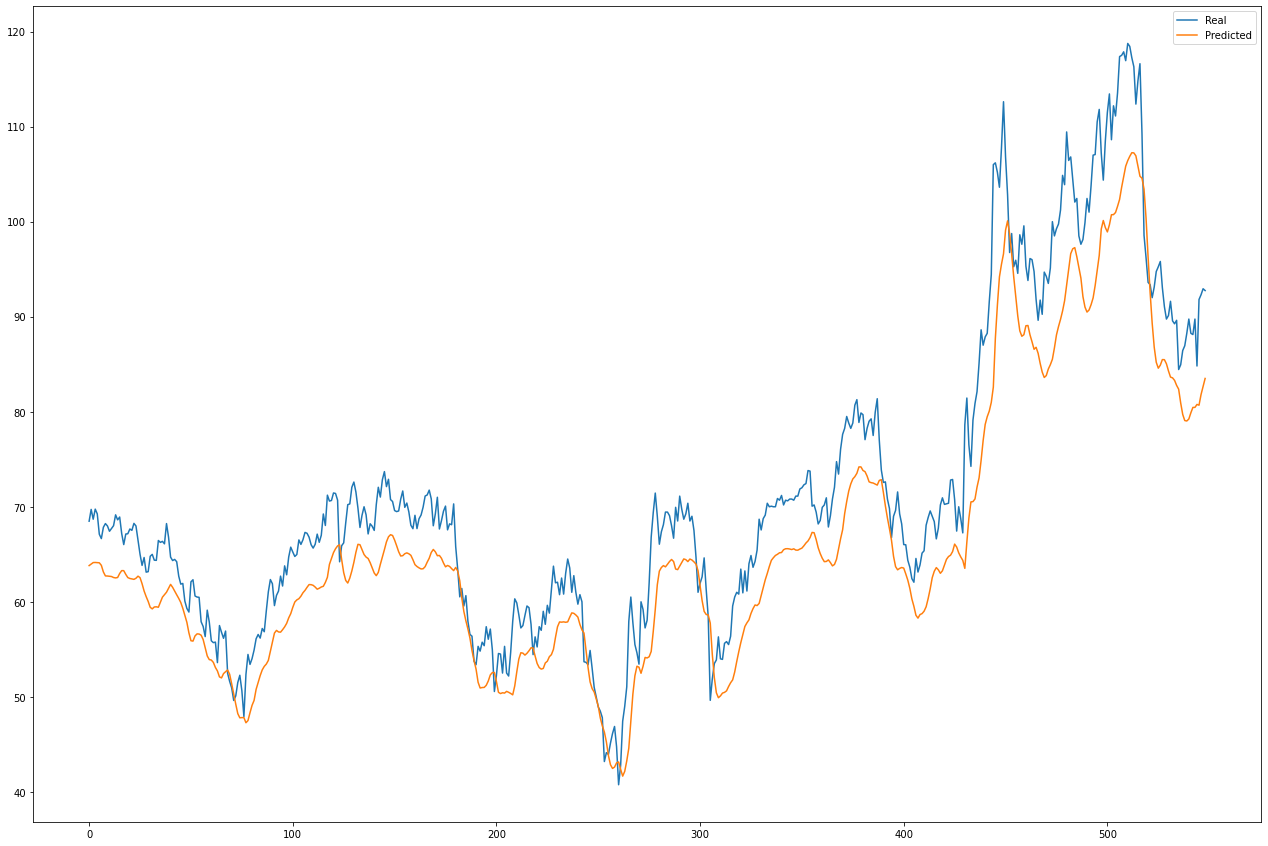

In [9]:
plt.gcf().set_size_inches(22, 15, forward=True)

start = 0
end = -1

real = plt.plot(unscaled_y_test[start:end], label='real')
pred = plt.plot(y_test_predicted[start:end], label='predicted')

# real = plt.plot(unscaled_y[start:end], label='real')
# pred = plt.plot(y_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()


#model.save(f'basic_model.h5')
